In [1]:
from model import build_time_series_ds, build_tft
from config import get_config
from levels import level_id, level_id_dates
import numpy as np
import pandas as pd 

from pytorch_forecasting import TemporalFusionTransformer,TimeSeriesDataSet

from IPython.display import clear_output

config = get_config()

In [9]:
trainer, tft, val_dataloader = build_tft(config)

train_dataloader, val_dataloader, ds_train,df = build_time_series_ds(config)

raw_preds = tft.predict(val_dataloader, mode="raw", return_x=True)

clear_output()

In [16]:
dsp = ds_train.get_parameters()
dsp['predict_mode'] = True

In [17]:
df,_= level_id_dates(3,True,False)

In [18]:
df

,date,store_id,value,wday,month,year,snap_CA,snap_TX,snap_WI,event_name_1_Chanukah End,...,cos_day_week,sin_day_of_year,cos_day_of_year,sin_week_year,cos_week_year,sin_month,cos_month,sin_quarter,cos_quarter,time_idx
0,2011-01-29,CA_1,4337,1,1,2011,0,0,0,0,...,-0.222521,0.478734,0.877960,-0.433884,-0.900969,0.500000,0.866025,0.500000,0.866025,0
1,2011-01-30,CA_1,4155,2,1,2011,0,0,0,0,...,0.623490,0.493776,0.869589,-0.433884,-0.900969,0.500000,0.866025,0.500000,0.866025,1
2,2011-01-31,CA_1,2816,3,1,2011,0,0,0,0,...,1.000000,0.508671,0.860961,-0.974928,-0.222521,0.500000,0.866025,0.500000,0.866025,2
3,2011-02-01,CA_1,3051,4,2,2011,1,1,0,0,...,0.623490,0.523416,0.852078,-0.974928,-0.222521,0.866025,0.500000,0.500000,0.866025,3
4,2011-02-02,CA_1,2630,5,2,2011,1,0,1,0,...,-0.222521,0.538005,0.842942,-0.974928,-0.222521,0.866025,0.500000,0.500000,0.866025,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19405,2016-05-18,WI_3,3268,5,5,2016,0,0,0,0,...,-0.222521,0.680773,-0.732494,-0.781831,0.62349,0.500000,-0.866025,0.866025,0.500000,1936
19406,2016-05-19,WI_3,3398,6,5,2016,0,0,0,0,...,-0.900969,0.668064,-0.744104,-0.781831,0.62349,0.500000,-0.866025,0.866025,0.500000,1937
19407,2016-05-20,WI_3,4126,7,5,2016,0,0,0,0,...,-0.900969,0.655156,-0.755493,-0.781831,0.62349,0.500000,-0.866025,0.866025,0.500000,1938
19408,2016-05-21,WI_3,4519,1,5,2016,0,0,0,0,...,-0.222521,0.642055,-0.766659,-0.781831,0.62349,0.500000,-0.866025,0.866025,0.500000,1939


In [19]:
dft, _ = level_id_dates(3, True, True)

dft.time_idx += 1941

dft.value = 0

test


In [20]:
dft

,date,store_id,value,wday,month,year,snap_CA,snap_TX,snap_WI,event_name_1_MemorialDay,...,cos_day_week,sin_day_of_year,cos_day_of_year,sin_week_year,cos_week_year,sin_month,cos_month,sin_quarter,cos_quarter,time_idx
0,2016-05-23,CA_1,0,3,5,2016,0,0,0,0,...,1.000000,0.615285,-0.788305,-0.0,1.0,5.000000e-01,-0.866025,0.866025,0.5,1941
1,2016-05-24,CA_1,0,4,5,2016,0,0,0,0,...,0.623490,0.601624,-0.798779,-0.0,1.0,5.000000e-01,-0.866025,0.866025,0.5,1942
2,2016-05-25,CA_1,0,5,5,2016,0,0,0,0,...,-0.222521,0.587785,-0.809017,-0.0,1.0,5.000000e-01,-0.866025,0.866025,0.5,1943
3,2016-05-26,CA_1,0,6,5,2016,0,0,0,0,...,-0.900969,0.573772,-0.819015,-0.0,1.0,5.000000e-01,-0.866025,0.866025,0.5,1944
4,2016-05-27,CA_1,0,7,5,2016,0,0,0,0,...,-0.900969,0.559589,-0.828770,-0.0,1.0,5.000000e-01,-0.866025,0.866025,0.5,1945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2016-06-15,WI_3,0,5,6,2016,0,1,1,0,...,-0.222521,0.263665,-0.964614,0.433884,-0.900969,1.224647e-16,-1.000000,0.866025,0.5,1964
276,2016-06-16,WI_3,0,6,6,2016,0,0,0,0,...,-0.900969,0.247022,-0.969010,0.433884,-0.900969,1.224647e-16,-1.000000,0.866025,0.5,1965
277,2016-06-17,WI_3,0,7,6,2016,0,0,0,0,...,-0.900969,0.230306,-0.973118,0.433884,-0.900969,1.224647e-16,-1.000000,0.866025,0.5,1966
278,2016-06-18,WI_3,0,1,6,2016,0,0,0,0,...,-0.222521,0.213521,-0.976938,0.433884,-0.900969,1.224647e-16,-1.000000,0.866025,0.5,1967


In [21]:
pred_outline = pd.concat([df,dft]).fillna(0)

In [22]:
pred_outline

,date,store_id,value,wday,month,year,snap_CA,snap_TX,snap_WI,event_name_1_Chanukah End,...,cos_day_week,sin_day_of_year,cos_day_of_year,sin_week_year,cos_week_year,sin_month,cos_month,sin_quarter,cos_quarter,time_idx
0,2011-01-29,CA_1,4337,1,1,2011,0,0,0,0.0,...,-0.222521,0.478734,0.877960,-0.433884,-0.900969,5.000000e-01,0.866025,0.500000,0.866025,0
1,2011-01-30,CA_1,4155,2,1,2011,0,0,0,0.0,...,0.623490,0.493776,0.869589,-0.433884,-0.900969,5.000000e-01,0.866025,0.500000,0.866025,1
2,2011-01-31,CA_1,2816,3,1,2011,0,0,0,0.0,...,1.000000,0.508671,0.860961,-0.974928,-0.222521,5.000000e-01,0.866025,0.500000,0.866025,2
3,2011-02-01,CA_1,3051,4,2,2011,1,1,0,0.0,...,0.623490,0.523416,0.852078,-0.974928,-0.222521,8.660254e-01,0.500000,0.500000,0.866025,3
4,2011-02-02,CA_1,2630,5,2,2011,1,0,1,0.0,...,-0.222521,0.538005,0.842942,-0.974928,-0.222521,8.660254e-01,0.500000,0.500000,0.866025,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2016-06-15,WI_3,0,5,6,2016,0,1,1,0.0,...,-0.222521,0.263665,-0.964614,0.433884,-0.900969,1.224647e-16,-1.000000,0.866025,0.500000,1964
276,2016-06-16,WI_3,0,6,6,2016,0,0,0,0.0,...,-0.900969,0.247022,-0.969010,0.433884,-0.900969,1.224647e-16,-1.000000,0.866025,0.500000,1965
277,2016-06-17,WI_3,0,7,6,2016,0,0,0,0.0,...,-0.900969,0.230306,-0.973118,0.433884,-0.900969,1.224647e-16,-1.000000,0.866025,0.500000,1966
278,2016-06-18,WI_3,0,1,6,2016,0,0,0,0.0,...,-0.222521,0.213521,-0.976938,0.433884,-0.900969,1.224647e-16,-1.000000,0.866025,0.500000,1967


In [23]:
tft = TemporalFusionTransformer.load_from_checkpoint(
    "checkpoints/1/LEVEL=0-epoch=0-val_loss=552.43.ckpt"
)

/home/luke/.local/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/home/luke/.local/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [33]:
pred_outline.wday = pred_outline.wday.astype(str)
pred_outline.month = pred_outline.month.astype(str)
pred_outline.reset_index(drop=True,inplace=True)

In [37]:
pred_outline.value = pred_outline.value.astype(float)

In [38]:
new_prediction_data = TimeSeriesDataSet.from_parameters(dsp,pred_outline)

In [39]:
raw_preds = tft.predict(new_prediction_data, mode="raw", return_x=True, num_workers=32)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [40]:
labels = {k: tft.hparams.embedding_labels[k] for k in tft.hparams.static_categoricals}
labels = {
    outer_k: {v: k for k, v in outer_v.items()} for outer_k, outer_v in labels.items()
}
groups = raw_preds[1]["groups"].cpu().numpy()

In [42]:
labels = {
    outer_k: {v: k for k, v in tft.hparams.embedding_labels[outer_k].items()}
    for outer_k in tft.hparams.static_categoricals
}

In [43]:
labels_list = list(labels.values())
new_groups_shape = (groups.shape[0], groups.shape[1])
new_groups = []

for group in groups:
    new_group = []
    for i, item in enumerate(group):
        
        dict_to_use = labels_list[i % len(labels_list)]
        new_value = dict_to_use.get(item, None)
        new_group.append(new_value)
    new_groups.append(new_group)

groups = np.array(new_groups, dtype=object)

preds = raw_preds[0].prediction

In [44]:
groups = raw_preds[1]["groups"].cpu().numpy()
labels_list = list(labels.values())

new_groups = [
    [labels_list[i % len(labels_list)].get(item, None) for i, item in enumerate(group)]
    for group in groups
]
groups = np.array(new_groups, dtype=object)

In [45]:
df_preds = pd.DataFrame()

for g in range(len(groups)):
    p = preds[g][:,3].cpu().numpy()
    col = tuple(groups[g])
    df_preds[col] = p

df_preds = df_preds.round(0)
df_preds.index = df_preds.index + 1942
df_preds = df_preds[:-2].astype(int)

In [46]:
df_preds

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
1942,4382,3059,6288,2195,2874,4072,3244,2775,3728,3548
1943,4353,3053,6243,2197,2879,4052,3233,2754,3674,3539
1944,4394,3058,6279,2194,2873,4069,3233,2755,3685,3545
1945,4443,3064,6346,2188,2865,4103,3238,2767,3735,3554
1946,4468,3055,6384,2177,2853,4114,3244,2763,3772,3554
1947,4449,3038,6364,2171,2847,4087,3237,2749,3761,3540
1948,4400,3044,6308,2178,2856,4074,3238,2756,3733,3539
1949,4311,3022,6236,2173,2847,4031,3218,2663,3695,3511
1950,4285,3019,6186,2175,2846,4015,3207,2640,3626,3505
1951,4335,3025,6233,2176,2838,4032,3208,2643,3641,3512


# true data?

In [47]:
df, identifiers = level_id(config['level'], test=True)
df_true = df.pivot_table(index="date", columns=identifiers, values="value")

test


In [48]:
df_true

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
date,,,,,,,,,,
2016-05-23,4091,4266,6282,2653,3351,3870,4151,3787,4276,3658
2016-05-24,3938,4009,5556,2681,3448,3650,3931,3531,3780,3232
2016-05-25,3971,3897,5526,2532,3116,3386,3445,3541,4044,2897
2016-05-26,4481,3982,5626,2699,2982,3448,3339,3440,4106,3133
2016-05-27,4698,4928,5756,2803,2880,2997,3493,4077,4451,3941
2016-05-28,5088,6294,6277,3035,4222,5368,4950,4804,4844,4114
2016-05-29,5767,5778,6505,2680,4104,4488,4081,4065,4384,3852
2016-05-30,5011,5117,6448,2948,3641,4408,3844,3451,3760,3715
2016-05-31,4484,3980,5715,2688,2982,3534,3521,3348,3710,3207


# loss 

In [49]:
df_preds = df_preds.reset_index(drop=True)
df_true = df_true.reset_index(drop=True)


df_preds.columns = [
    col[0] if isinstance(col, tuple) and len(col) == 1 else col
    for col in df_preds.columns
]
df_true.columns = [
    col[0] if isinstance(col, tuple) and len(col) == 1 else col
    for col in df_true.columns
]

In [50]:
mse = ((df_true - df_preds)**2).mean()

historical_diffs = df_true.diff().iloc[1:] 
scaling_factors = (historical_diffs**2).mean()

scaling_factors = scaling_factors.replace(0, np.nan)

rmsse = np.sqrt(mse / scaling_factors).mean()

In [51]:
rmsse

1.661976831661767

In [5]:
from preds import rmsse_scores

In [6]:
rmsse, df_preds, df_true = rmsse_scores(
    "checkpoints/6/epoch=1-val_loss=527.08-6.ckpt"
)
rmsse

1.2121199855229001

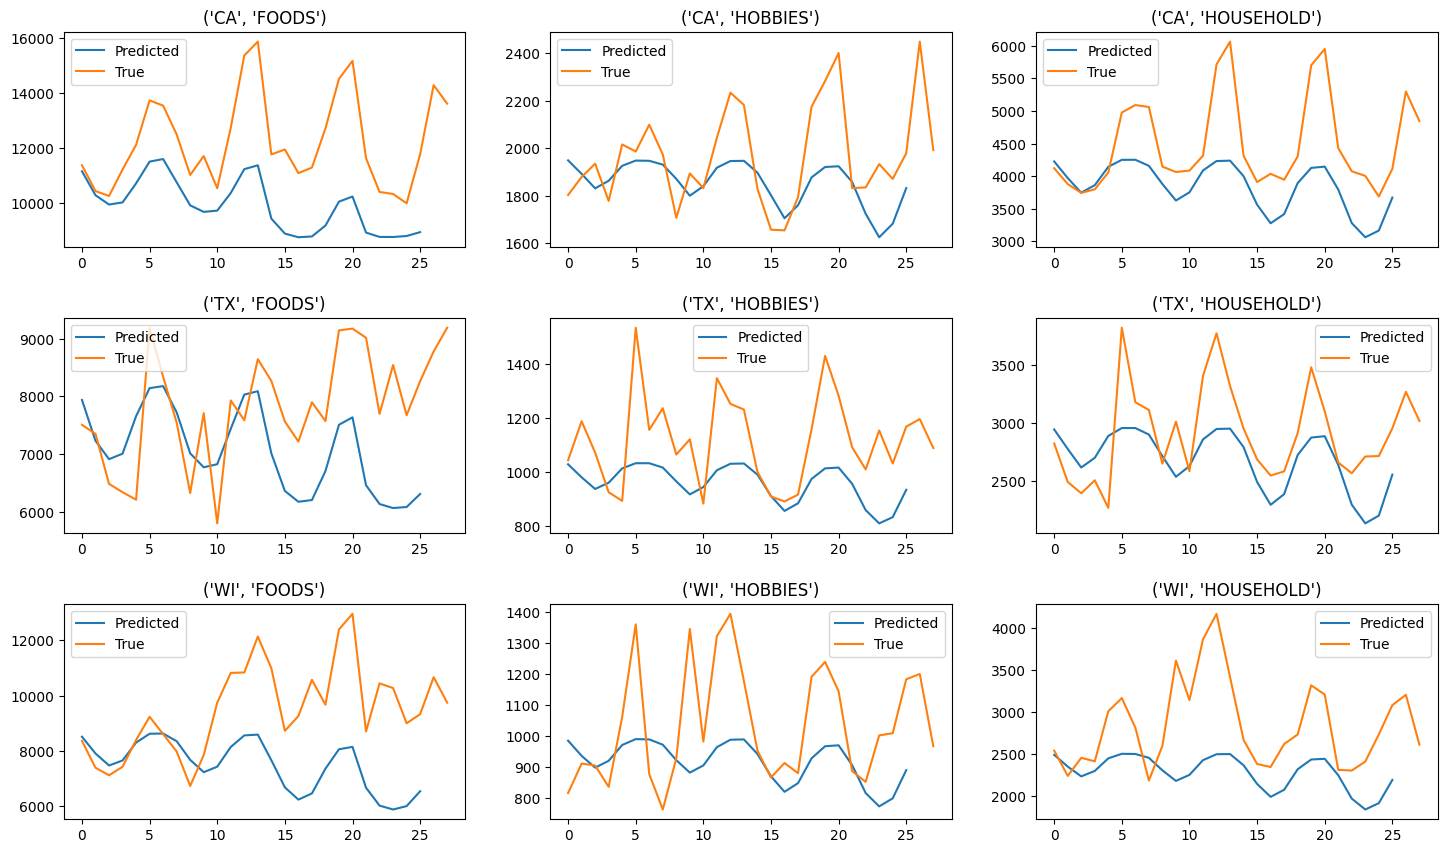

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the number of rows and columns for the subplot grid
n_cols = len(df_preds.columns)
n_rows = int(
    np.ceil(np.sqrt(n_cols))
)  # Ensure at least enough rows to accommodate all columns
n_cols = n_rows  # Making a square grid to accommodate all plots

fig, axs = plt.subplots(
    n_rows, n_cols, figsize=(15, n_rows * 3)
)  # Adjusting figure size dynamically
fig.tight_layout(pad=3.0)  # Add spacing between plots

for idx, col in enumerate(df_preds.columns):
    ax = axs.flatten()[idx]  # Flatten the array of axes to easily iterate over it
    ax.plot(df_preds[col], label="Predicted")
    ax.plot(df_true[col], label="True")
    ax.set_title(col)
    ax.legend()

# Hide unused subplots if any
for idx in range(len(df_preds.columns), n_rows * n_cols):
    axs.flatten()[idx].set_visible(False)

plt.show()